In [64]:
import numpy as np
from ase import Atoms

def change_angle(R_ij, R_ik, theta):
    # 原子jとkの位置を設定
    # 原子jはx軸上に、原子kは原点に配置
    pos_i = np.array([0, 0, 0])
    pos_j = np.array([R_ij, 0, 0])
    
    # 角度θに基づいて原子iの位置を計算
    # 原子iは原子jとkが定義する平面上を動く
    x_k = R_ik * np.cos(theta)
    y_k = R_ik * np.sin(theta)
    pos_k = np.array([x_k, y_k, 0])
    
    return pos_i, pos_j, pos_k

def get_angle(pos_i, pos_j, pos_k, is_degree=True):
    vec_ij = pos_j - pos_i
    vec_ik = pos_k - pos_i
    cos_angle = np.dot(vec_ij, vec_ik) / (np.linalg.norm(vec_ij) * np.linalg.norm(vec_ik))
    angle = np.arccos(cos_angle)
    if is_degree:
        angle = np.degrees(angle)
    return angle

In [65]:
R_ij = 1.0
R_ik = 1.0
theta = np.pi / 4  # 45度

pos_i, pos_j, pos_k = change_angle(R_ij, R_ik, theta)
print('Atom positions:')
print(f'i: {pos_i}')
print(f'j: {pos_j}')
print(f'k: {pos_k}')

# 角度を検証
angle = get_angle(pos_i, pos_j, pos_k, is_degree=True)

print('Angle in degrees:', angle)

Atom positions:
i: [0 0 0]
j: [1. 0. 0.]
k: [0.70710678 0.70710678 0.        ]
Angle in degrees: 45.0


/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_14601/1796640831.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


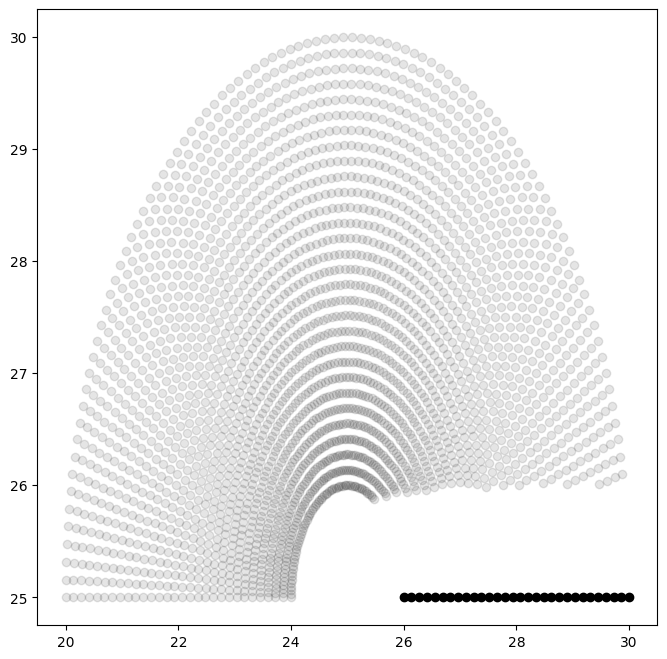

In [66]:
import matplotlib.pyplot as plt

R_range = np.linspace(1.0, 5.0, 30)
theta_range = np.linspace(0, np.pi, 100)
distance_thredhold = 1.0

cell_length = 50
cell = np.array([[cell_length, 0, 0], [0, cell_length, 0], [0, 0, cell_length]])
shift = cell_length / 2

all_atoms = []

fig, ax = plt.subplots(figsize=(8, 8))
# ax.plot(0, 0, 'o', color='black')
for r in R_range:
    ax.plot(r+shift, shift, 'o', color='black')
    for theta in theta_range:
        pos_i, pos_j, pos_k = change_angle(r, r, theta)
        pos_i = pos_i + shift
        pos_j = pos_j + shift
        pos_k = pos_k + shift
        # calculate distance between j and k
        R_jk = np.linalg.norm(pos_j - pos_k)
        if R_jk < distance_thredhold:
            continue
        angle = get_angle(pos_i, pos_j, pos_k, is_degree=True)
        # plot only x and y coordinates
        ax.plot(pos_k[0], pos_k[1], 'o', color='black', alpha=0.1)
        atoms = Atoms('Si3', positions=[pos_i, pos_j, pos_k], cell=cell)
        all_atoms.append(atoms)
fig.show()

In [67]:
from mlptools.io.write import QuantumEspressoWriter
import os
path2template = "/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-three/angle_dependency_analysis/template"
path2save = "/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-three/angle_dependency_analysis/result"

for i, atoms in enumerate(all_atoms):
    writer = QuantumEspressoWriter(atoms, path2template)
    scf_lines = writer.output()
    # create directory
    dirname = f'scf_{i}'
    os.makedirs(os.path.join(path2save, dirname), exist_ok=True)

    # write scf.in
    with open(os.path.join(path2save, dirname, 'scf.in'), 'w') as f:
        f.write('\n'.join(scf_lines))

50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5094454214954537 0.5176290672689516 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5088813322521155 0.5179198754858267 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5083083002600377 0.5181926399070904 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5077269025138625 0.5184470858820917 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5071377244318375 0.5186829572053021 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5065413592663485 0.5189000163742934 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5059384075065655 0.5190980448288814 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.5053294762738006 0.5192768431711988 0.5
50.0 0.0 0.0
0.0 50.0 0.0
0.0 0.0 50.0
Si 0.5 0.5 0.5
Si 0.52 0.5 0.5
Si 0.50471

In [ ]:
from glob import glob
import os
import subprocess
import random

n_parallel = 40
path2root = "/home/y1u0d2/result/qe/Si/mp-three/angle_dependency_analysis/result"
scf_dirs = glob(f'{path2root}/scf*')

# shuffle list
random.shuffle(scf_dirs)

for scf_dir in scf_dirs:
    if os.path.exists(f'{scf_dir}/scf.out'):
        print(f'{scf_dir}/scf.out already exists')
        continue
    
    process = subprocess.Popen(
    f'mpiexec.hydra -n {n_parallel} -machine $TMPDIR/machines pw.x -in {scf_dir}/scf.in > {scf_dir}/scf.out',
    shell=True)
    process.wait()

In [ ]:
from glob import glob
import os


path2result = "/home/y1u0d2/result/qe/Si/mp-three/angle_dependency_analysis/result"
scf_dirs = glob(f'{path2result}/scf*')

count = 0
for scf_dir in scf_dirs:
    if os.path.exists(f'{scf_dir}/scf.out'):
        count += 1

print(f'Total {len(scf_dirs)} calculations')
print(f'Finished {count} calculations')